# Convert Images into Binary Table (For Spark)

- author  :Sylvie Dagoret-Campagne
- affiliaiton : IJCLab/IN2P3/CNRS
- creation date : July 8th 2020
- update date :

In [69]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np
import pandas as pd
import os
import sys
%matplotlib inline

In [70]:
from astropy.io import fits

In [71]:
#to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10,6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [72]:
plt.rcParams.update({'figure.max_open_warning': 0}) # to see a large number of files

In [73]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Configuration

In [74]:
DATADIR="../data/atm"

In [75]:
atmospheric_basename_files=os.listdir(DATADIR)

In [76]:
inputfile=os.path.join(DATADIR,atmospheric_basename_files[0])

In [77]:
atmospheric_basename_files

['lsst_atm_10year_01.fits',
 'lsst_atm_10year_07.fits',
 'lsst_atm_10year_06.fits',
 'lsst_atm_10year_10.fits',
 'lsst_atm_10year_09.fits',
 'lsst_atm_10year_05.fits',
 'lsst_atm_10year_04.fits',
 'lsst_atm_10year_08.fits',
 'lsst_atm_10year_03.fits',
 '.ipynb_checkpoints',
 'lsst_atm_10year_02.fits']

In [78]:
'lsst_atm_10year_01.fits'.split('.')

['lsst_atm_10year_01', 'fits']

# Open all atmospheric files

In [79]:
idx=0
all_data=[]
all_hdr=[]
all_wl=[]
for file in atmospheric_basename_files:
    
    if file.split(".")[-1]=="fits":
        inputfile=os.path.join(DATADIR,file)
        hdu = fits.open(inputfile)
        all_hdr.append(hdu[0].header)
        all_data.append(hdu[0].data[1:,:])
        all_wl.append(hdu[0].data[0,:])
        hdu.close()
        
    idx+=1
    

In [80]:
data=np.vstack(all_data)

## Extract info from header

### Pick up the header column index 

In [81]:
hdr=all_hdr[0]

In [82]:
NbAtmSimul=hdr['NBATMSIM']
idx_out_num=hdr['ID_NUM']
idx_out_year=hdr['ID_YEAR']
idx_out_am=hdr['ID_AM']
idx_out_vaod=hdr['ID_VAOD']
idx_out_pwv=hdr['ID_PWV']
idx_out_o3=hdr['ID_O3']
idx_out_cld=hdr['ID_CLD']
idx_out_res=hdr['ID_RES']

In [83]:
idx_out_num

0

## Atmospheric data

In [84]:
vaod=data[1:,idx_out_vaod] # vertical aerosol depth
pwv=data[1:,idx_out_pwv]   # precipitable water vapor (mm)
o3=data[1:,idx_out_o3]     # ozone
cld=data[1:,idx_out_cld]   # clouds (not used)

In [85]:
# Extract wavelength Wavelength
wl=all_wl[0][idx_out_res:]
transm=data[:,idx_out_res:]

In [86]:
transm.shape

(3650, 951)

In [ ]:
NBSIM=transm.shape[0]

Text(0.5, 1.0, 'image of atmospheric simulation')

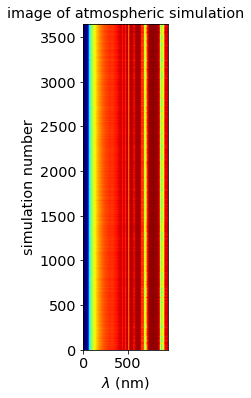

In [95]:
plt.imshow(transm,origin="lower",cmap='jet')
plt.xlabel("$\\lambda$ (nm)")
plt.ylabel("simulation number")
plt.title("image of atmospheric simulation")

## Output binary table

In [88]:
from astropy.table import QTable,Table

In [89]:
data

array([[  0.       ,   1.       ,   1.2      , ...,   0.8951863,
          0.8951863,   0.891646 ],
       [  1.       ,   1.       ,   1.2      , ...,   0.8971408,
          0.8971408,   0.8937076],
       [  2.       ,   1.       ,   1.2      , ...,   0.8626066,
          0.8626066,   0.8608381],
       ...,
       [727.       ,   1.       ,   1.2      , ...,   0.8831409,
          0.8831409,   0.8801059],
       [728.       ,   1.       ,   1.2      , ...,   0.9138674,
          0.9138674,   0.91006  ],
       [729.       ,   1.       ,   1.2      , ...,   0.9315307,
          0.9315307,   0.9279073]])

In [90]:
#t = Table(data,names=["id_num","id_year","id_am","vaod","pwv","o3","cld"])
t = Table(data)

In [98]:
t

col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40,col41,col42,col43,col44,col45,col46,col47,col48,col49,col50,col51,col52,col53,col54,col55,col56,col57,col58,col59,col60,col61,col62,col63,col64,col65,col66,col67,col68,col69,col70,col71,col72,col73,col74,col75,col76,col77,col78,col79,col80,col81,col82,col83,col84,col85,col86,col87,col88,col89,col90,col91,col92,col93,col94,col95,col96,col97,col98,col99,col100,col101,col102,col103,col104,col105,col106,col107,col108,col109,col110,col111,col112,col113,col114,col115,col116,col117,col118,col119,col120,col121,col122,col123,col124,col125,col126,col127,col128,col129,col130,col131,col132,col133,col134,col135,col136,col137,col138,col139,col140,col141,col142,col143,col144,col145,col146,col147,col148,col149,col150,col151,col152,col153,col154,col155,col156,col157,col158,col159,col160,col161,col162,col163,col164,col165,col166,col167,col168,col169,col170,col171,col172,col173,col174,col175,col176,col177,col178,col179,col180,col181,col182,col183,col184,col185,col186,col187,col188,col189,col190,col191,col192,col193,col194,col195,col196,col197,col198,col199,col200,col201,col202,col203,col204,col205,col206,col207,col208,col209,col210,col211,col212,col213,col214,col215,col216,col217,col218,col219,col220,col221,col222,col223,col224,col225,col226,col227,col228,col229,col230,col231,col232,col233,col234,col235,col236,col237,col238,col239,col240,col241,col242,col243,col244,col245,col246,col247,col248,col249,col250,col251,col252,col253,col254,col255,col256,col257,col258,col259,col260,col261,col262,col263,col264,col265,col266,col267,col268,col269,col270,col271,col272,col273,col274,col275,col276,col277,col278,col279,col280,col281,col282,col283,col284,col285,col286,col287,col288,col289,col290,col291,col292,col293,col294,col295,col296,col297,col298,col299,col300,col301,col302,col303,col304,col305,col306,col307,col308,col309,col310,col311,col312,col313,col314,col315,col316,col317,col318,col319,col320,col321,col322,col323,col324,col325,col326,col327,col328,col329,col330,col331,col332,col333,col334,col335,col336,col337,col338,col339,col340,col341,col342,col343,col344,col345,col346,col347,col348,col349,col350,col351,col352,col353,col354,col355,col356,col357,col358,col359,col360,col361,col362,col363,col364,col365,col366,col367,col368,col369,col370,col371,col372,col373,col374,col375,col376,col377,col378,col379,col380,col381,col382,col383,col384,col385,col386,col387,col388,col389,col390,col391,col392,col393,col394,col395,col396,col397,col398,col399,col400,col401,col402,col403,col404,col405,col406,col407,col408,col409,col410,col411,col412,col413,col414,col415,col416,col417,col418,col419,col420,col421,col422,col423,col424,col425,col426,col427,col428,col429,col430,col431,col432,col433,col434,col435,col436,col437,col438,col439,col440,col441,col442,col443,col444,col445,col446,col447,col448,col449,col450,col451,col452,col453,col454,col455,col456,col457,col458,col459,col460,col461,col462,col463,col464,col465,col466,col467,col468,col469,col470,col471,col472,col473,col474,col475,col476,col477,col478,col479,col480,col481,col482,col483,col484,col485,col486,col487,col488,col489,col490,col491,col492,col493,col494,col495,col496,col497,col498,col499,col500,col501,col502,col503,col504,col505,col506,col507,col508,col509,col510,col511,col512,col513,col514,col515,col516,col517,col518,col519,col520,col521,col522,col523,col524,col525,col526,col527,col528,col529,col530,col531,col532,col533,col534,col535,col536,col537,col538,col539,col540,col541,col542,col543,col544,col545,col546,col547,col548,col549,col550,col551,col552,col553,col554,col555,col556,col557,col558,col559,col560,col561,col562,col563,col564,col565,col566,col567,col568,col569,col570,col571,col572,col573,col574,col575,col576,col577,col578,col579,col580,col581,col582,col583,col584,col585,col586,c

In [104]:
t.write('!lsst_atm_10year_bintab.fits',format='fits')

In [105]:
t.write?

In [93]:
theheader=hdr
theheader["EXTEND"]=True

In [100]:
t = fits.BinTableHDU.from_columns(data)

TypeError: Element 0 in the ColDefs input is not a Column.

In [94]:
hduout = fits.BinTableHDU(data=data,header=theheader,name="atmsim",uint=False)

TypeError: Table data has incorrect type.

In [ ]:
hduout.writeto('lsst_atm_10year_bintab.fits')